# 使用基于组分特征对神经网络的多个分组模型进行训练

- 导入数据

In [1]:
# 导库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [2]:
# 一些参数
TEST_SIZE = 0.30
RANDOM_STATE = 42

In [3]:
# 导入数据
data = pd.read_csv('../../data/groups/composition_features_groups/data_clusters_total.csv')
data.head()
X_train = data[data['class'] == 'train']
X_test = data[data['class'] == 'test']
display(X_train.head())
display(X_test.head())
print(X_train.shape)
print(X_test.shape)

,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster,class
0,5.369542,2.132453,3.237090,20.0,53.0,33.0,42.000000,14.666667,53.0,7.0,...,0.000000,0.0,64.0,225.0,161.0,117.666667,71.555556,64.0,7,train
1,20.952346,13.461579,7.490766,16.0,59.0,43.0,31.428571,17.632653,16.0,8.0,...,0.000000,0.0,70.0,225.0,155.0,127.571429,65.795918,70.0,7,train
2,46.967161,42.005900,4.961261,8.0,73.0,65.0,25.400000,21.760000,8.0,9.0,...,0.000001,0.0,12.0,229.0,217.0,95.300000,99.960000,12.0,3,train
3,9.885204,6.939711,2.945493,17.0,82.0,65.0,32.666667,20.888889,17.0,5.0,...,0.000000,0.0,64.0,229.0,165.0,118.555556,72.740741,64.0,4,train
4,8.808742,5.420374,3.388368,8.0,32.0,24.0,13.600000,7.360000,8.0,68.0,...,0.000000,0.0,12.0,225.0,213.0,91.000000,94.800000,12.0,9,train


,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster,class
5093,14.078999,6.862966,7.216033,3.0,25.0,22.0,12.769231,7.372781,8.0,1.0,...,0.000110,0.0,12.0,229.0,217.0,92.692308,99.313609,12.0,6,test
5094,23.198326,15.958896,7.239430,8.0,57.0,49.0,29.750000,18.166667,16.0,13.0,...,0.000047,0.0,12.0,217.0,205.0,118.750000,66.541667,70.0,0,test
5095,21.690907,11.098378,10.592529,29.0,57.0,28.0,38.500000,9.250000,34.0,13.0,...,0.000000,0.0,14.0,225.0,211.0,111.750000,97.750000,14.0,7,test
5096,37.388675,30.495613,6.893062,1.0,20.0,19.0,8.857143,6.367347,6.0,1.0,...,0.000000,0.0,194.0,229.0,35.0,207.857143,15.836735,194.0,8,test
5097,11.310439,3.828769,7.481670,13.0,47.0,34.0,29.400000,9.040000,34.0,65.0,...,0.000000,0.0,2.0,225.0,223.0,53.800000,68.480000,14.0,7,test


(5093, 137)
(2184, 137)


In [4]:
# 移除不需要的列
X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)
display(X_train.head())
display(X_test.head())

,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster
0,5.369542,2.132453,3.237090,20.0,53.0,33.0,42.000000,14.666667,53.0,7.0,...,0.000000e+00,0.000000,0.0,64.0,225.0,161.0,117.666667,71.555556,64.0,7
1,20.952346,13.461579,7.490766,16.0,59.0,43.0,31.428571,17.632653,16.0,8.0,...,0.000000e+00,0.000000,0.0,70.0,225.0,155.0,127.571429,65.795918,70.0,7
2,46.967161,42.005900,4.961261,8.0,73.0,65.0,25.400000,21.760000,8.0,9.0,...,6.350000e-07,0.000001,0.0,12.0,229.0,217.0,95.300000,99.960000,12.0,3
3,9.885204,6.939711,2.945493,17.0,82.0,65.0,32.666667,20.888889,17.0,5.0,...,0.000000e+00,0.000000,0.0,64.0,229.0,165.0,118.555556,72.740741,64.0,4
4,8.808742,5.420374,3.388368,8.0,32.0,24.0,13.600000,7.360000,8.0,68.0,...,0.000000e+00,0.000000,0.0,12.0,225.0,213.0,91.000000,94.800000,12.0,9


,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster
5093,14.078999,6.862966,7.216033,3.0,25.0,22.0,12.769231,7.372781,8.0,1.0,...,0.000072,0.000110,0.0,12.0,229.0,217.0,92.692308,99.313609,12.0,6
5094,23.198326,15.958896,7.239430,8.0,57.0,49.0,29.750000,18.166667,16.0,13.0,...,0.000026,0.000047,0.0,12.0,217.0,205.0,118.750000,66.541667,70.0,0
5095,21.690907,11.098378,10.592529,29.0,57.0,28.0,38.500000,9.250000,34.0,13.0,...,0.000000,0.000000,0.0,14.0,225.0,211.0,111.750000,97.750000,14.0,7
5096,37.388675,30.495613,6.893062,1.0,20.0,19.0,8.857143,6.367347,6.0,1.0,...,0.000000,0.000000,0.0,194.0,229.0,35.0,207.857143,15.836735,194.0,8
5097,11.310439,3.828769,7.481670,13.0,47.0,34.0,29.400000,9.040000,34.0,65.0,...,0.000000,0.000000,0.0,2.0,225.0,223.0,53.800000,68.480000,14.0,7


In [5]:
grouped_data = X_train.groupby('cluster')

In [6]:
def get_X_y(data_group):
    X = data_group.drop(columns=['e_total', 'e_ionic', 'e_electronic'])
    y = data_group['e_total']
    return X, y

- 搭建模型

In [7]:
# 加载数据
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets.to_numpy().reshape(-1, 1)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # 根据索引获取数据和目标，并将它们转换为张量
        x = torch.tensor(self.data[index], dtype=torch.float32)
        y = torch.tensor(self.targets[index], dtype=torch.float32)
        return x, y
    


In [8]:
# 搭建神经网络
import torch.nn as nn
# 导入optim
import torch.optim as optim

class NN_model(nn.Module):
    def __init__(self):
        super(NN_model, self).__init__()
        
        # 使用Sequential定义神经网络的结构
        self.layers = nn.Sequential(
            nn.BatchNorm1d(133),
            nn.Linear(133, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
        
    def forward(self, x):
        # 前向传播
        return self.layers(x)

- 模型训练

In [9]:
def data_load(X, y):
    # 创建自定义数据集实例
    dataset = CustomDataset(X.to_numpy(), y)   # 注意X,y都为pandas.DataFrame
    # 创建数据加载器
    batch_size = 64
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return data_loader, dataset

def nn_train(data_loader, dataset, learning_rate, num_epochs):
    device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')

    print(device)

    # 初始化模型、损失函数和优化器
    model = NN_model()
    # 使用均方误差作为损失函数
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.to(device)
    criterion.to(device)
    # 训练模型
    model.train()
    for epoch in range(num_epochs):
        # Forward pass
        epoch_loss = 0
        for i, (features, targets) in enumerate(data_loader):
            features = features.to(device)
            targets = targets.to(device)
            outputs = model(features)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
            # Backward and optimize
            optimizer.zero_grad()    # 梯度重置
            loss.backward() # 向后传播计算梯度
            optimizer.step() # 通过梯度更新参数

        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, MSE: {epoch_loss/len(dataset):.4f}')

    return model



In [10]:
def plot_cross_val_scores(mse, mae, y_hat, y_train):
    '''绘制交叉验证的结果'''
    print(f'MSE: {mse}, MAE: {mae}')

    # 绘制parity plot
    fig, ax = plt.subplots(dpi=300)
    ax.scatter(y_train, y_hat, s=1)
    ax.plot(y_train, y_train, c='k', zorder=-5)
    ax.set_xlabel('Actual $\epsilon_{total}$')
    ax.set_ylabel('Predicted $\epsilon_{total}$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    plt.show()

In [11]:
# 对每个group进行训练
nn_models = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    print(f"-------------cluster {group}-------------")
    X, y = get_X_y(data_group)
    # 加载数据
    data_loader, dataset = data_load(X, y)
    model = nn_train(data_loader, dataset, learning_rate=0.0015, num_epochs=1000)
    nn_models[group] = model

-------------cluster 0-------------
cpu
Epoch [50/1000], Loss: 31836.6017, MSE: 32.9571
Epoch [100/1000], Loss: 20008.2404, MSE: 20.7125
Epoch [150/1000], Loss: 10993.8807, MSE: 11.3808
Epoch [200/1000], Loss: 9099.4189, MSE: 9.4197
Epoch [250/1000], Loss: 27848.2076, MSE: 28.8284
Epoch [300/1000], Loss: 6618.9751, MSE: 6.8519
Epoch [350/1000], Loss: 6748.7630, MSE: 6.9863
Epoch [400/1000], Loss: 5535.0806, MSE: 5.7299
Epoch [450/1000], Loss: 8066.0728, MSE: 8.3500
Epoch [500/1000], Loss: 7219.8899, MSE: 7.4740
Epoch [550/1000], Loss: 8050.3951, MSE: 8.3337
Epoch [600/1000], Loss: 6151.5452, MSE: 6.3681
Epoch [650/1000], Loss: 5089.3002, MSE: 5.2684
Epoch [700/1000], Loss: 6439.3675, MSE: 6.6660
Epoch [750/1000], Loss: 11016.7307, MSE: 11.4045
Epoch [800/1000], Loss: 7499.0436, MSE: 7.7630
Epoch [850/1000], Loss: 6450.4557, MSE: 6.6775
Epoch [900/1000], Loss: 7614.5186, MSE: 7.8825
Epoch [950/1000], Loss: 6104.2333, MSE: 6.3191
Epoch [1000/1000], Loss: 5527.5848, MSE: 5.7221
----------

### 模型测试

In [12]:
# 模型测试
def model_test(X_test, models):
    X_test_copy = X_test.copy()
    y_preds = []
    for index, test_item in X_test_copy.iterrows():
        cluster = test_item['cluster']
        if cluster not in models.keys():
            y_preds.append(None)
            continue
        X_item = test_item.drop(['e_total', 'e_ionic', 'e_electronic'])
        models[cluster].eval()
        y_pred = models[cluster](torch.tensor(pd.DataFrame(X_item).T.to_numpy(), dtype=torch.float32))
        y_preds.append(y_pred[0].item())
        # print(f'Cluster: {cluster}, Predicted e_electronic: {y_pred[0]}')
        
    X_test_copy['e_electronic_pred'] = y_preds
    X_test_copy.dropna(axis=0, inplace=True)
    mse = mean_squared_error(X_test_copy['e_electronic'], X_test_copy['e_electronic_pred'])
    mae = mean_absolute_error(X_test_copy['e_electronic'], X_test_copy['e_electronic_pred'])
    plot_cross_val_scores(mse, mae, X_test_copy['e_electronic_pred'], X_test_copy['e_electronic'])

    return y_preds, mse, mae

MSE: 10828443.15474595, MAE: 95.03605474039946


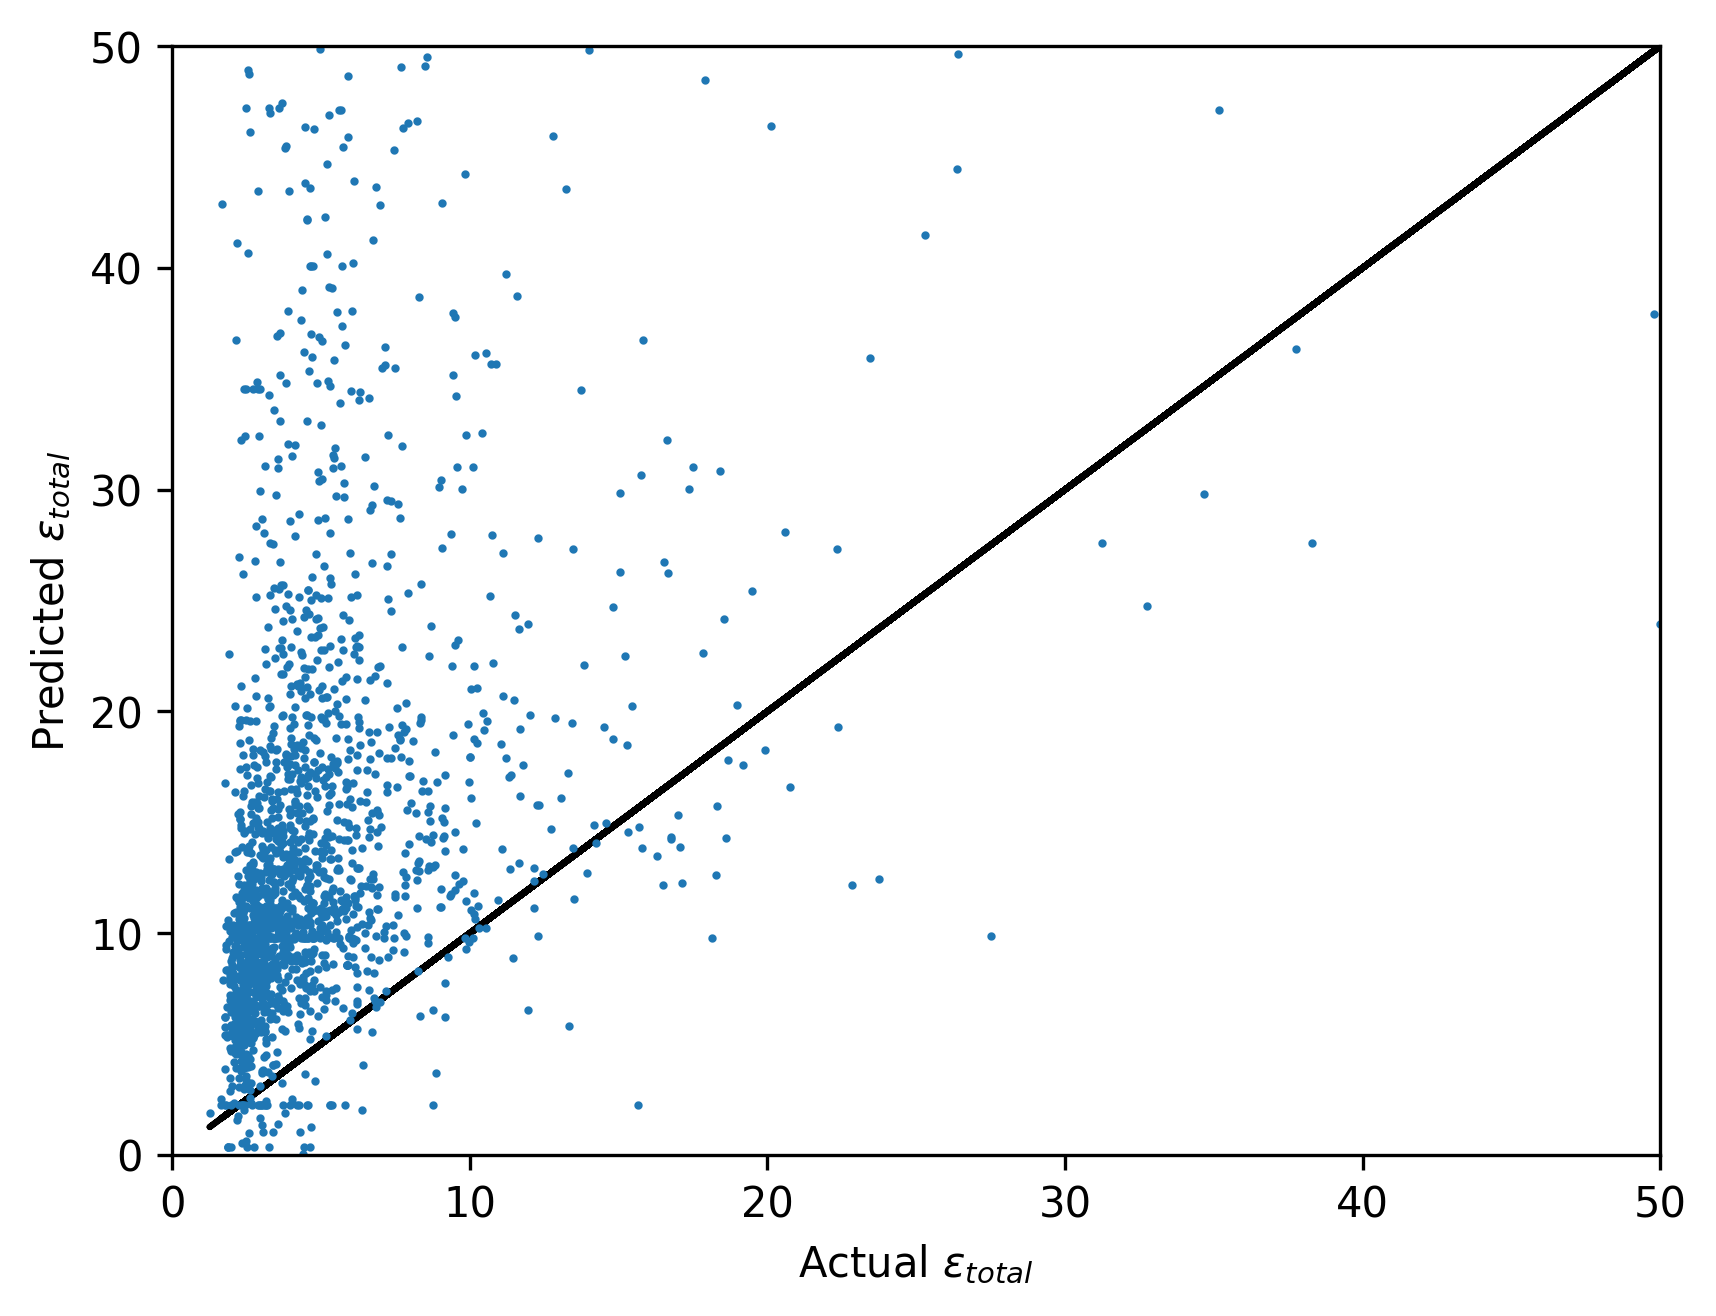

In [13]:
y_hat, mse, mae = model_test(X_test, nn_models)

MSE: 2536.161864559338, MAE: 14.990518177127152


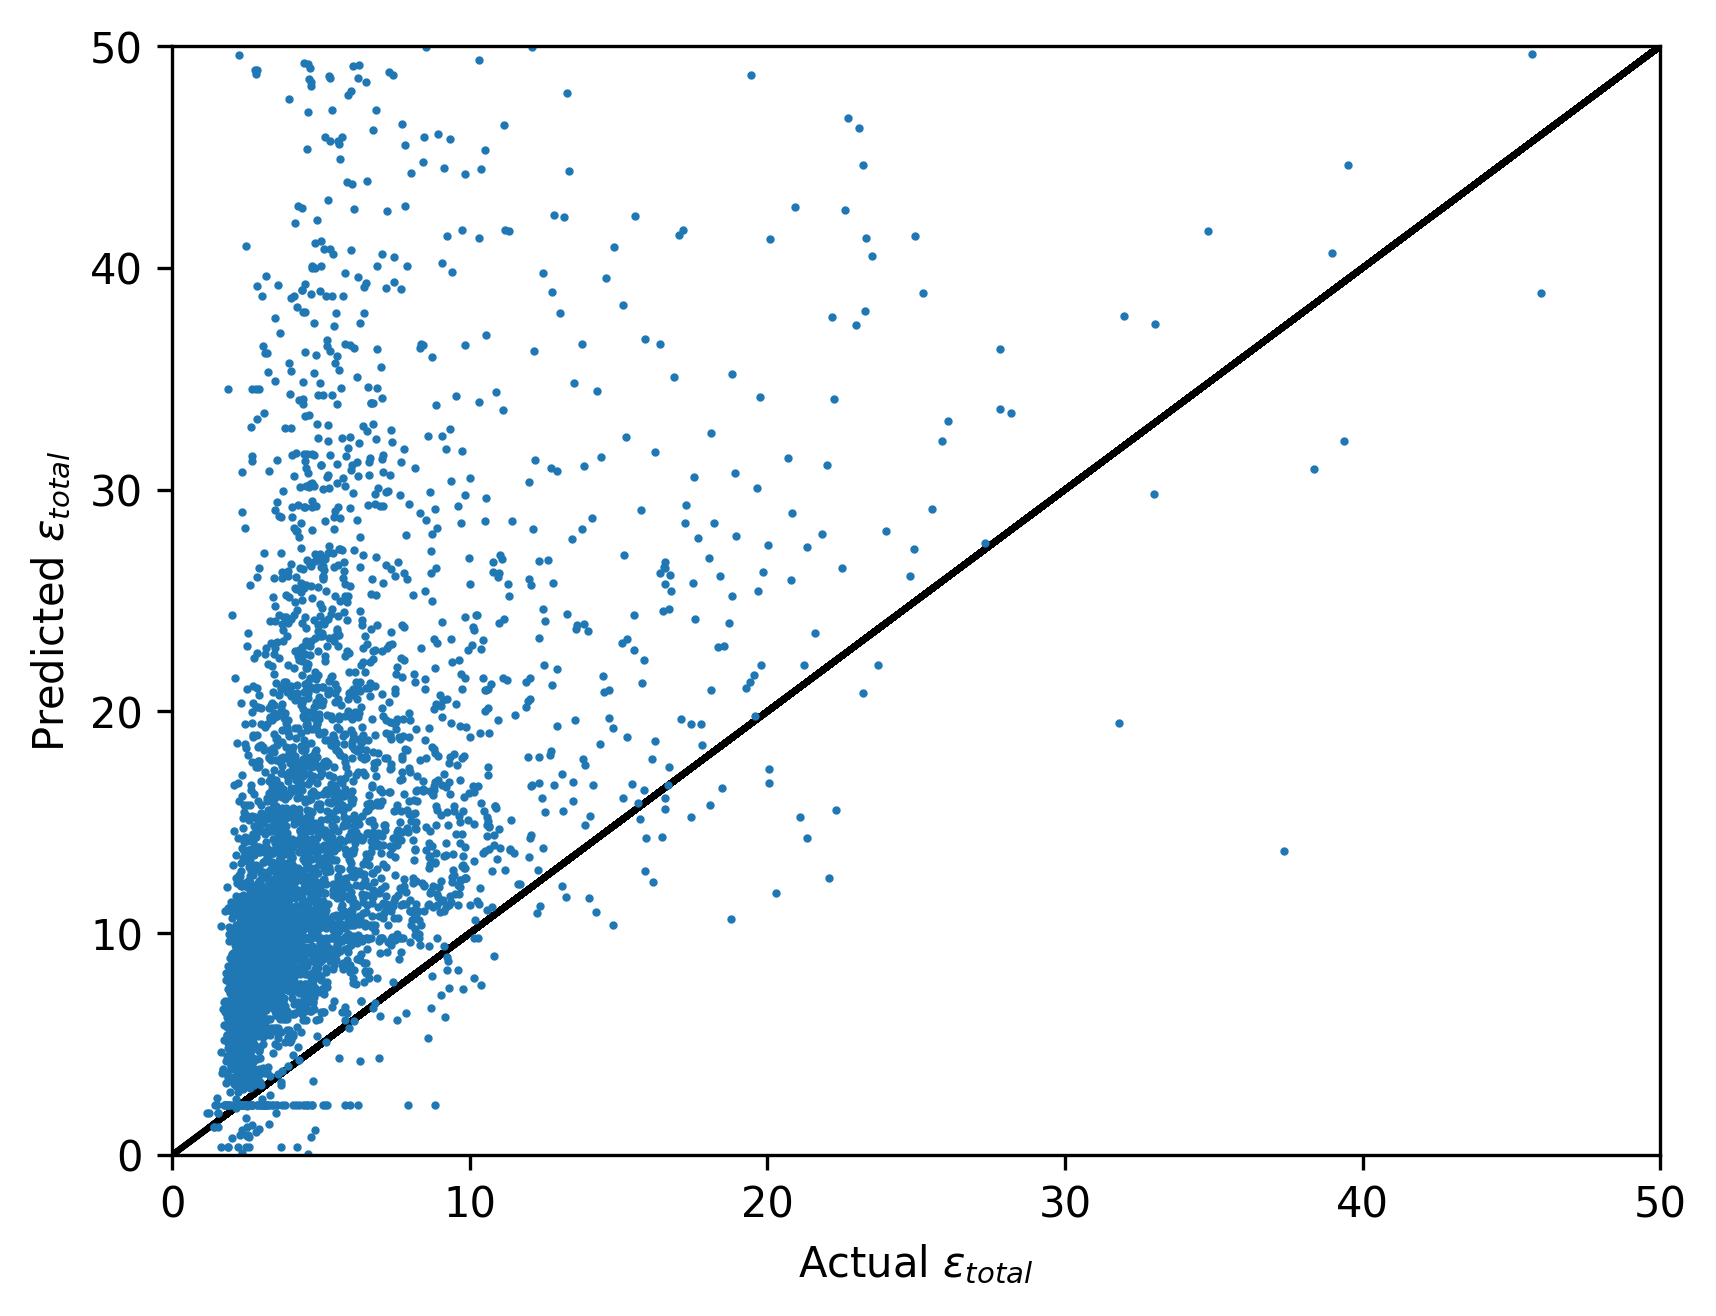

In [14]:
# 看看训练集的MSE
y_hat, mse, mae = model_test(X_train, nn_models)